# Лабораторная работа №3: Меры связи случайных величин. Интервальные оценки параметров

**Выполнил:** Шарыкин Александр Викторович  
В качестве источника данных использовался сборник Росстата "Регионы России. Социально-экономические показатели" (https://rosstat.gov.ru/folder/210/document/47652)

In [1]:
import pandas as pd
from pandas import ExcelFile, DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import t
from math import sqrt

## Часть 1

В качестве предполагаемых зависимых признаков возьмём **"долю населения старше трудоспособного возраста (%)"** и **"число умерших на 1000 населения (чел.)"**.

In [2]:
xlsx = ExcelFile("Razdel 1 - Naselenie.xlsx")
df1 = pd.read_excel(xlsx, sheet_name="1.6.3.") # Доля населения старше трудоспособного возраста

# Приведём данные к анализируемому виду
first_row_num = df1[df1[df1.columns[0]] == "Белгородская область"].index[0]
last_row_num = df1[df1[df1.columns[0]] == "Чукотский автономный округ"].index[0]
df1 = df1.iloc[first_row_num:last_row_num+1]
df1 = df1[~df1[df1.columns[0]].isin(["Архангельская область", "Тюменская область", "в том числе:"])]
df1 = df1[~df1[df1.columns[0]].str.contains("федеральный округ")]
df1 = df1[[df1.columns[0], df1.columns[-1]]]
df1 = df1.set_axis(["Регион", "Значение в 2022"], axis=1)
df1 = df1.reset_index(drop=True).dropna()
df1

,Регион,Значение в 2022
0,Белгородская область,26.9
1,Брянская область,26.8
2,Владимирская область,28.3
3,Воронежская область,27.6
4,Ивановская область,28.3
...,...,...
80,Амурская область,21.5
81,Магаданская область,19.8
82,Сахалинская область,23.5
83,Еврейская автономная область,22.3


In [3]:
xlsx = ExcelFile("Razdel 1 - Naselenie.xlsx")
df2 = pd.read_excel(xlsx, sheet_name="1.10.") # Число умерших на 1000 населения

# Приведём данные к анализируемому виду
first_row_num = df2[df2[df2.columns[0]] == "Белгородская область"].index[0]
last_row_num = df2[df2[df2.columns[0]] == "Чукотский автономный округ"].index[0]
df2 = df2.iloc[first_row_num:last_row_num+1]
df2 = df2[~df2[df2.columns[0]].isin(["Архангельская область", "Тюменская область", "в том числе:"])]
df2 = df2[~df2[df2.columns[0]].str.contains("федеральный округ")]
df2 = df2[[df2.columns[0], df2.columns[-1]]]
df2 = df2.set_axis(["Регион", "Значение в 2022"], axis=1)
df2 = df2.reset_index(drop=True).dropna()
df2

,Регион,Значение в 2022
0,Белгородская область,14.2
1,Брянская область,15.6
2,Владимирская область,16.8
3,Воронежская область,15.3
4,Ивановская область,17.3
...,...,...
80,Амурская область,14.8
81,Магаданская область,12.7
82,Сахалинская область,13.8
83,Еврейская автономная область,15.2


Найдём коэффициент корреляции:

In [4]:
r = df2["Значение в 2022"].corr(df1["Значение в 2022"])
print(f"Коэффициент корреляции между признаками: {round(r, 4)}")

Коэффициент корреляции между признаками: 0.8679


Рассчитанное значение коэффициента корреляции позволяет говорить о наличии **высокой положительной связи** между признаками.

Построим линейную регрессионную модель и найдём величину достоверности аппроксимации (R^2). Для случая парной регрессии (с константой) она будет равен коэффициенту корреляции в квадрате:

In [5]:
x = df1[["Значение в 2022"]]
y = df2["Значение в 2022"]
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
r_squared = model.score(x, y)
print(f"Величина достоверности аппроксимации (R^2): {round(r_squared, 4)}. Коэффициент корреляции в квадрате: {round(r**2, 4)}")

Величина достоверности аппроксимации (R^2): 0.7532. Коэффициент корреляции в квадрате: 0.7532


Построим диаграмму рассеяния для признаков с линией аппроксимации:

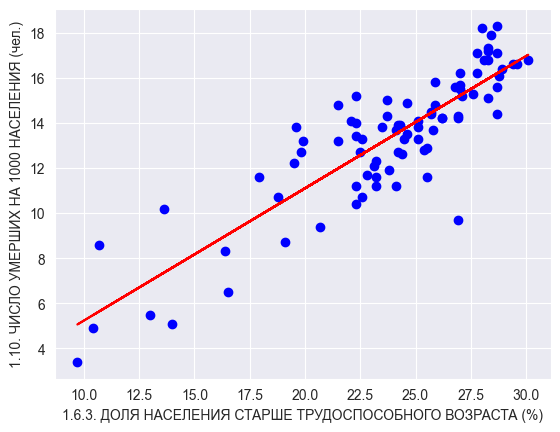

In [6]:
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red', label='Линия аппроксимации')
plt.xlabel("1.6.3. ДОЛЯ НАСЕЛЕНИЯ СТАРШЕ ТРУДОСПОСОБНОГО ВОЗРАСТА (%)")
plt.ylabel("1.10. ЧИСЛО УМЕРШИХ НА 1000 НАСЕЛЕНИЯ (чел.)")
plt.show()

## Часть 2
В качестве генеральной совокупности возьмём **"удельный вес городского населения в общей численности населения (%)"**.

In [7]:
xlsx = ExcelFile("Razdel 1 - Naselenie.xlsx")
df = pd.read_excel(xlsx, sheet_name="1.3.")
first_row_num = df[df[df.columns[0]] == "Белгородская область"].index[0]
last_row_num = df[df[df.columns[0]] == "Чукотский автономный округ"].index[0]
df = df.iloc[first_row_num:last_row_num + 1]
df = df[[df.columns[0], df.columns[-1]]]
df = df.set_axis(['Регион', 'Значение в 2022'], axis=1)
df = df[~df[df.columns[0]].isin(["Архангельская область", "Тюменская область", "в том числе:"])]
df = df.dropna().reset_index(drop=True)

In [8]:
df_pop = df[~df[df.columns[0]].str.contains("федеральный округ")]
size_pop = len(df_pop)
col_pop = df_pop["Значение в 2022"]
mean_pop = col_pop.mean()
df_pop

,Регион,Значение в 2022
0,Белгородская область,65.4
1,Брянская область,69.6
2,Владимирская область,77.6
3,Воронежская область,68.5
4,Ивановская область,82.1
...,...,...
87,Амурская область,68.4
88,Магаданская область,96.5
89,Сахалинская область,82.6
90,Еврейская автономная область,70.8


### Случайная выборка
Сделаем полностью случайную выборку, составляющую 1/3 от генеральной совокупности:

In [9]:
size_sample = round(1/3 * size_pop)
df_sample = df_pop.sample(size_sample).reset_index(drop=True)
df_sample

,Регион,Значение в 2022
0,Курганская область,64.2
1,Алтайский край,58.3
2,Ставропольский край,60.7
3,Брянская область,69.6
4,Кабардино-Балкарская Республика,51.8
5,Челябинская область,82.6
6,Республика Северная Осетия - Алания,63.2
7,Новгородская область,73.1
8,Республика Саха (Якутия),67.2
9,Республика Марий Эл,68.8


Сравним среднее по генеральной совокупности и по случайной выборке:

In [10]:
col_sample = df_sample["Значение в 2022"]
mean_sample = col_sample.mean()
std_sample = col_sample.std()
print(f"Среднее по генеральной совокупности: {round(mean_pop, 2)}")
print(f"Среднее по случайной выборке: {round(mean_sample, 2)}")
if mean_pop < mean_sample:
    print(f"Генеральное среднее меньше выборочного")
else:
    print(f"Генеральное среднее больше выборочного")

Среднее по генеральной совокупности: 70.9
Среднее по случайной выборке: 72.36
Генеральное среднее меньше выборочного


Построим на основе случайной выборки доверительные интервалы для генерального среднего для разных уровней доверия и посмотрим, попадает ли оно в них:

In [11]:
for gamma in (0.99, 0.95, 0.90):
    t_crit = t.ppf((1+gamma)/2, size_sample-1)
    delta = t_crit * std_sample / sqrt(size_sample) * sqrt((size_pop - size_sample) / (size_pop - 1))
    left = mean_sample - delta
    right = mean_sample + delta
    print(f"{round(gamma*100)}%-й доверительный интервал для генерального среднего: ({round(left, 2)}, {round(right, 2)})")
    if left < mean_pop < right:
        print(f"Генеральное среднее попадает в {round(gamma*100)}%-й доверительный интервал")
    else:
        print(f"Генеральное среднее не попадает в {round(gamma*100)}%-й доверительный интервал")

99%-й доверительный интервал для генерального среднего: (66.72, 78.01)
Генеральное среднее попадает в 99%-й доверительный интервал
95%-й доверительный интервал для генерального среднего: (68.19, 76.54)
Генеральное среднее попадает в 95%-й доверительный интервал
90%-й доверительный интервал для генерального среднего: (68.9, 75.83)
Генеральное среднее попадает в 90%-й доверительный интервал


### Cтратифицированная выборка
Сделаем стратифицированную выборку по федеральным округам, составляющую 1/3 от генеральной совокупности. Из каждого федерального округа будут случайным образом выбраны несколько регионов, причём их число будет пропорциональное доле, которую составляют регионы этого округа в общем количестве регионов в РФ:

In [12]:
df_sample = DataFrame()
indexes = df[df[df.columns[0]].str.contains("федеральный округ")].index.tolist()
indexes.append(df.index[-1])
start_index = 0
for index in indexes:
    df_district = df.iloc[start_index:index]
    size_district = len(df_district)
    sample_size_district = round(size_district/size_pop * size_sample)
    df_sample = df_sample._append(df_district.sample(sample_size_district), ignore_index=True)
    start_index = index + 1
df_sample

,Регион,Значение в 2022
0,Липецкая область,63.0
1,Тамбовская область,60.4
2,Брянская область,69.6
3,Тульская область,73.2
4,Владимирская область,77.6
5,Воронежская область,68.5
6,Вологодская область,72.5
7,Архангельская область без автономного округа,77.8
8,Республика Карелия,79.7
9,Республика Коми,77.7


Сравним среднее по генеральной совокупности и по стратифицированной выборке:

In [13]:
col_sample = df_sample["Значение в 2022"]
mean_sample = col_sample.mean()
std_sample = col_sample.std()
print(f"Среднее по генеральной совокупности: {round(mean_pop, 2)}")
print(f"Среднее по стратифицированной выборке: {round(mean_sample, 2)}")
if mean_pop < mean_sample:
    print(f"Генеральное среднее меньше выборочного")
else:
    print(f"Генеральное среднее больше выборочного")

Среднее по генеральной совокупности: 70.9
Среднее по стратифицированной выборке: 72.36
Генеральное среднее меньше выборочного


Построим на основе стратифицированной выборки доверительные интервалы для генерального среднего для разных уровней доверия и посмотрим, попадает ли оно в них:

In [14]:
for gamma in (0.99, 0.95, 0.90):
    t_crit = t.ppf((1+gamma)/2, size_sample-1)
    delta = t_crit * std_sample / sqrt(size_sample) * sqrt((size_pop - size_sample) / (size_pop - 1))
    left = mean_sample - delta
    right = mean_sample + delta
    print(f"{round(gamma*100)}%-й доверительный интервал для генерального среднего: ({round(left, 2)}, {round(right, 2)})")
    if left < mean_pop < right:
        print(f"Генеральное среднее попадает в {round(gamma*100)}%-й доверительный интервал")
    else:
        print(f"Генеральное среднее не попадает в {round(gamma*100)}%-й доверительный интервал")

99%-й доверительный интервал для генерального среднего: (67.04, 77.68)
Генеральное среднее попадает в 99%-й доверительный интервал
95%-й доверительный интервал для генерального среднего: (68.42, 76.3)
Генеральное среднее попадает в 95%-й доверительный интервал
90%-й доверительный интервал для генерального среднего: (69.09, 75.63)
Генеральное среднее попадает в 90%-й доверительный интервал


## Выводы
В ходе лабораторной работы я проанализировал довольно много наборов данных и пришёл к следующим выводам:
1. В сборнике содержится немало коррелирующих признаков.
2. Генеральное среднее часто попадает во все доверительные интервалы, построенные как по случайной, так и по стратифицированной выборке.
